In [1]:
import sys
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.io import ascii
import plot_util
import sncosmo

In [39]:
data=ascii.read('snRequiem.dat')
data['flux']=data['psf_flux']
models=ascii.read('lens_models.dat')
data['mag']=-2.5*np.log10(data['flux'])+data['zp']
data['magerr']=1.0857*data['fluxerr']/data['flux']
im0=data[data['id']==0]
im1=data[data['id']==1]
im2=data[data['id']==2]
models=models[models['MODEL']!='SN.4']
zp=23.9
dust = sncosmo.CCM89Dust()

salt2=sncosmo.Model('salt2-extended',effects=[dust],
                       effect_names=['mw'],
                       effect_frames=['obs'])
time=np.linspace(-45,140,100)
image_colors=np.array([im['mag'][np.where(im['band']=='f105w')[0][0]]-\
             im['mag'][np.where(im['band']=='f160w')[0][0]] for im in [im0,im1,im2]])
image_color_errs=np.array([np.sqrt(np.sum(im['magerr']**2)) for im in [im0,im1,im2]])

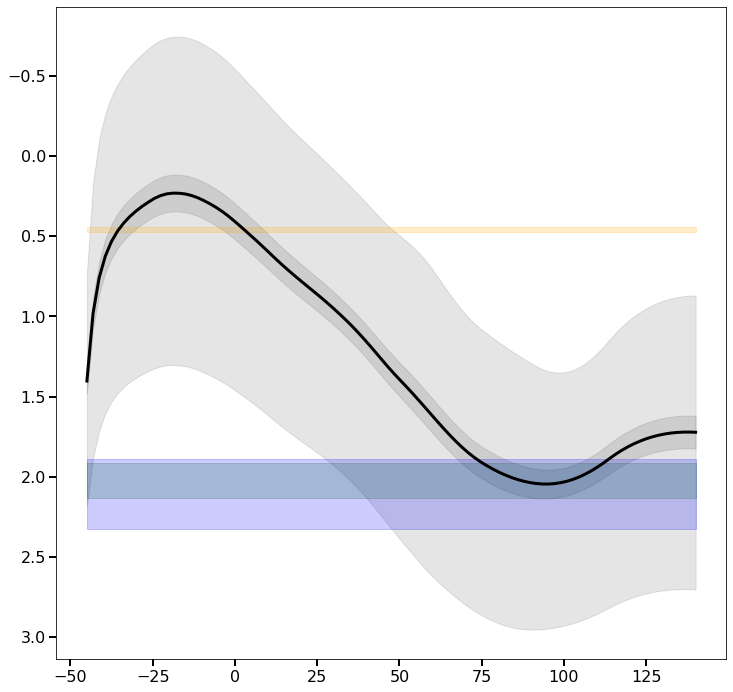

In [67]:
salt2.set(**{'z':1.9459,'mwebv':.014,'t0':0,'x1':0,'c':0})


ax= plot_util.plot('plot',time,salt2.color('F105W','F160W','ab',time),
                  linewidth=3,color='k')
salt2.set(c=.5)
maxcVals=salt2.color('F105W','F160W','ab',time)
salt2.set(c=-.4)
mincVals=salt2.color('F105W','F160W','ab',time)

salt2.set(c=.05)
smallmaxc=salt2.color('F105W','F160W','ab',time)
salt2.set(c=-.05)
smallminc=salt2.color('F105W','F160W','ab',time)

ax.fill_between(time,mincVals,maxcVals,color='k',alpha=.1)
ax.fill_between(time,smallminc,smallmaxc,color='k',alpha=.1)
colors=['g','orange','b']
for i in range(len(image_colors)):
    ax.fill_between(time,image_colors[i]-image_color_errs[i],
                    image_colors[i]+image_color_errs[i],color=colors[i],alpha=.2)
ax.invert_yaxis()

In [65]:
c_range=np.linspace(-1,1,1000)
minc={0:[],1:[],2:[]}
maxc={0:[],1:[],2:[]}
for t in time:
    for i in range(len(image_colors)):
        colorVals=[]
        for c in c_range:
            salt2.set(c=c)
            colorVals=np.append(colorVals,salt2.color('F105W','F160W','ab',t))
        minMaxVals=c_range[np.where(np.logical_and(colorVals>=image_colors[i]-image_color_errs[i],
                                colorVals<=image_colors[i]+image_color_errs[i]))[0]]
        #maxVals=colorVals[colorVals<=image_colors[i]+image_color_errs[i]]
        if len(minMaxVals)>0:
            minc[i]=np.append(minc[i],np.min(minMaxVals))
        else:
            minc[i]=np.append(minc[i],[np.nan])
        if len(minMaxVals)>0:
            maxc[i]=np.append(maxc[i],np.max(minMaxVals))
        else:
            maxc[i]=np.append(maxc[i],[np.nan])

        

    

-0.07107107107107113
-0.973973973973974
-0.08508508508508505


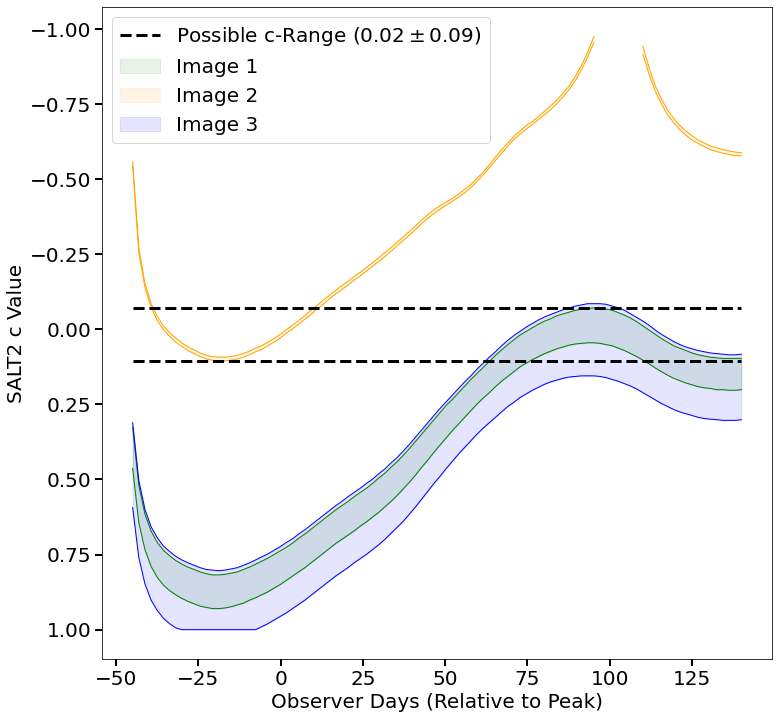

In [93]:
ax=plot_util.plot('plot',[],[],x_lab='Observer Days (Relative to Peak)',
                 y_lab='SALT2 c Value',fontsize=20,ticklabelsize=20)
all_minc=np.inf
all_maxc=-np.inf
for i in range(len(image_colors)):
    ax.fill_between(time,minc[i],maxc[i],alpha=.1,color=colors[i],label='Image %i'%(i+1))
    ax.plot(time,minc[i],color=colors[i],linewidth=1)
    ax.plot(time,maxc[i],color=colors[i],linewidth=1)
    print(np.nanmin(minc[i]))
    if np.nanmin(minc[i])>all_maxc:
        all_maxc=np.nanmin(minc[i])
    if np.nanmax(maxc[i])<all_minc:
        all_minc=np.nanmax(maxc[i])
ax.plot(time,[all_minc]*len(time),'k--',linewidth=3)
# ax.plot(time,[all_maxc]*len(time),'k--',linewidth=3,
#         label=r'Possible c-Range ($%.2f^{+%.2f}_{-%.2f}$)'%(np.median([all_minc,all_maxc]),
#                                                            all_minc-np.median([all_minc,all_maxc]),
#                                                            np.median([all_minc,all_maxc])-all_maxc
#                                                            ))
ax.plot(time,[all_maxc]*len(time),'k--',linewidth=3,
        label=r'Possible c-Range ($%.2f\pm%.2f$)'%(np.median([all_minc,all_maxc]),
                                                    all_minc-np.median([all_minc,all_maxc])))
ax.invert_yaxis()
ax.legend(fontsize=20,loc='upper left')
plt.savefig('possible_c_values.pdf',format='pdf')

In [88]:
all_minc

0.10510510510510507

In [89]:
all_maxc

-0.07107107107107113

In [90]:
np.median([all_minc,all_maxc])

0.017017017017016967